# An introductional notebook to HEP analysis using pyROOT

In this notebook, you'll explore computing techniques commonly used in High Energy Physics (HEP) analysis. We'll guide you through creating, filling, and plotting a histogram to visualize physics data, such as the number of leptons, all in under 20 lines of code!


<CENTER>
    <a href="http://opendata.atlas.cern" class="icons"><img src="../../images/ATLASOD.gif" style="width:40%"></a>
</CENTER>

This tutorial also serves as an introduction to [ROOT](https://root.cern.ch/), a scientific data analysis framework. ROOT offers a comprehensive set of tools for big data processing, statistical analysis, visualization, and storage—making it useful for modern HEP research.

The following analysis is looking at events where [Z bosons](https://en.wikipedia.org/wiki/W_and_Z_bosons) decay to two leptons of same flavour and opposite charge, (e.g., Z → e$^+$e$^-$ or Z → μ$^+$μ$^-$), as shown in the [Feynman diagram](https://en.wikipedia.org/wiki/Feynman_diagram).

<CENTER><img src="../../images/Z_ElectronPositron.png" style="width:30%"></CENTER>

## What is the Z Boson?

The Z boson is one of the mediators of the weak force, which is responsible for processes such as [beta decay](https://en.wikipedia.org/wiki/Beta_decay) in atomic nuclei. It interacts with all known fermions (quarks and leptons), but unlike the W boson, it does not change the type (flavor) of particle it interacts with. The Z boson couples to both [left-handed and right-handed](https://en.wikipedia.org/wiki/Chirality_(physics)) particles, making its behavior distinct from the charged W boson.

Since the Z boson is electrically neutral, its decay products must have balanced charges. The decays of the Z boson into leptons (electrons, muons, and taus) are particularly useful for experimental studies because these particles can be precisely measured in detectors, giving a clear signature of the Z boson's presence.

## The Decay of the Z Boson
The Z boson decays rapidly due to its high mass, with a mean lifetime of around 3 × 10$^{-25}$ seconds. Its decay channels include hadrons (quarks) and leptons, but in this analysis, we are particularly interested in the lepton channels because they produce clean final states that are easier to measure.

## Running a Jupyter notebook
A Jupyter notebook consists of cell blocks, each containing lines of Python code. Each cell can be run independently of each other, yielding respective outputs below the cells. Conventionally,cells are run in order from top to bottom.

- To run the whole notebook, in the top menu click Cell $\to$ Run All.
- To propagate a change you've made to a piece of code, click Cell $\to$ Run All Below.
- You can also run a single code cell, by clicking Cell $\to$ Run Cells, or using the keyboard shortcut Shift+Enter.

For more information, refer to [How To Use Jupyter Notebooks](https://www.codecademy.com/article/how-to-use-jupyter-notebooks).

By the end of this notebook you will be able to:
1. Learn to process large data sets using cuts
2. Understand some general principles of a particle physics analysis
3. Discover the Z boson!

## Initializing the notebook
To begin, we need to include `ROOT` to suport our analysis. To visualize the histogram interactively, we enable the `JSROOT` magic function. This allows us to display the ROOT histograms directly in the notebook.

In [1]:
import ROOT
%jsroot on

In [ ]:
# install required packages. --user is only necessary in SWAN (not in colab or binder)
%pip install --user atlasopenmagic

In [ ]:
# Now we have to do a little bit of work to make sure that atlasopenmagic is available in our python path
# This is because SWAN by default does not include the local package installation area in the PYTHONPATH
# Again, this is not necessary on binder or colab
import sys
import os
sys.path += [ f'{os.environ["HOME"]}/.local/lib/python{sys.version_info.major}.{sys.version_info.minor}/site-packages' ]

# Now we can safely import atlasopenmagic
import atlasopenmagic as atom

In [ ]:
# Now let's see what releases are available to us
atom.available_releases()

In [5]:
# And let's plan to use the latest release of Open Data for Outreach and Education
atom.set_release('2025e-13tev-beta')

Fetching and caching all metadata for release: 2025e-13tev-beta...
Fetched 374 datasets so far...
Successfully cached 374 datasets.
Active release: 2025e-13tev-beta. (Datasets path: REMOTE)


## Making a histogram
We begin by opening the data file we wish to analyze. The data is stored in a ***.root*** file, which consists of a tree structure containing branches and leaves. In this example, we are reading the data directly from a remote source:

In [6]:
# Here we use the root protocol; you can use https if you don't have xrootd available
file_path = atom.get_urls(key='700320', skim='1LMET30', protocol='root')[0]
f = ROOT.TFile.Open(file_path) 
print(file_path)

root://eospublic.cern.ch:1094//eos/opendata/atlas/rucio/opendata/ODEO_FEB2025_v0_1LMET30_mc_700320.Sh_2211_Zee_maxHTpTV2_BFilter.1LMET30.root


<div class="alert alert-info">
  <b>‼️ NOTE:</b>
  To know more about the contents of the ATLAS Open Data datasets, please visit our <a href="https://opendata.atlas.cern/docs/data/for_education/13TeV25_details" target="_blank">documentation.</a> 
</div>

Next, we define a tree (we'll name it ***tree***) to extract the data from the ***.root*** file, from the tree called `analysis`, that holds the data.

In [7]:
tree = f.Get("analysis")
n_events = tree.GetEntries()
print(f"The dataset has {n_events} numbers of events")

The dataset has 1550382 numbers of events


Now, we create a canvas on which we will draw our histogram. Without a canvas, we won't be able to visualize the histogram. The following command creates a canvas named ***Canvas*** with a title and sets its width and height:

In [8]:
canvas = ROOT.TCanvas("Canvas","a first way to plot a variable",800,600)

We also need to define the histogram that will be placed on this canvas. The histogram is named **variable** and its title is **"Number of leptons"**. It has 5 bins that span the range from -0.5 to 4.5 (for a total range of 0 to 4 leptons):

In [9]:
hist = ROOT.TH1F("variable","Number of leptons; Number of leptons ; Events ",5, -0.5, 4.5)

The following lines are a loop that goes over the data that is stored in the tree and fills the histogram (h) that we already defined. The loop fills the histogram for each event stored in the tree. After the program has looped over all the data it prints "Done!"

In [10]:
for event in tree:
    hist.Fill(tree.lep_n)
    
print("Done!")

Done!


After filling the histogram we want to vizualize the results. First we draw the histogram on the canvas and then the canvas on which the histogram lies.

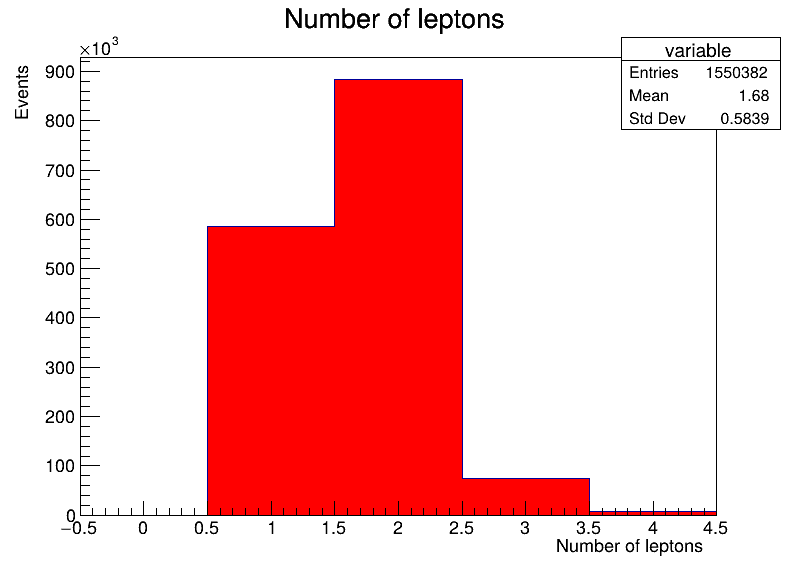

Info in <TCanvas::Print>: png file Zll_inv_mass.png has been created


In [11]:
hist.SetFillColor(2)
hist.Draw()
canvas.Draw()

# If you want a copy of your plot locally, uncomment the following line
# c.SaveAs("Zll_inv_mass.pdf") # pdf image

### Interpreting the histogram
In the plot above, we visualize the distribution of the number of leptons per event. This histogram provides insight into the frequency of events containing different numbers of leptons.

- **X-axis**: Represents the number of leptons detected in each event. The values range from 0 to 4, where each bin corresponds to an integer number of leptons.
- **Y-axis**: Shows the number of events (scaled to thousands) that contain the corresponding number of leptons.

From the data:

- The majority of events contain either 1 or 2 leptons, with the peak occurring at 2 leptons, suggesting that this number of leptons is the most common in the analyzed dataset.
- Events with 0, 3, or 4 leptons are significantly less frequent, as indicated by the lower heights of their corresponding bins.

In the statistics box on the top right:

- We see that the total number of events analyzed is 1,550,382.
- The mean number of leptons per event is around 1.68, indicating that most events contain slightly fewer than 2 leptons on average.
- The standard deviation of around 0.5839 shows a relatively low spread, meaning that most events are clustered around the mean number of leptons, with little variation.

This histogram gives us a snapshot of the lepton content in the events, which can be further analyzed to study processes like lepton production in proton-proton collisions at high energies. The distribution is an important aspect of understanding the data and may inform further cuts or selection criteria for a complex physics analysis.

In this example, as always, it is a good idea to see if the result matches your intuition. Here we began with a sample of Z bosons decaying to electrons, so it makes good sense that most events contain exactly two electrons. Can you think of some reasons why there might be only one or three in some events? The file we selected has **1LMET30** in the name, meaning that the events in it were pre-selected to have at least one lepton. That also helps explain why there are so few zero-electron events. If you would like, you can try picking a file from a [different sample](https://opendata.atlas.cern/docs/data/for_education/13TeV25_metadata) to see how the result changes.